In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from skimage.morphology import remove_small_holes, skeletonize
import pandas as pd
from matplotlib import animation
from matplotlib import rcParams
from scipy.interpolate import UnivariateSpline
from sklearn.linear_model import LinearRegression
from tqdm import tqdm
from pyfcd.fcd import calculate_carriers, fcd, normalize_image

THRESHOLD = 120
MAX_PIXEL_VALUE = 255
MM2_CALIBRATION = 1000*(924)*1e-6  #largo*(diametro) de la cabecilla [µm^2 -> mm^2]

plt.style.use("default")
COLOR = 'black'

# FIGURE & AXES
rcParams['figure.figsize'] = (15,10)
rcParams['figure.dpi'] = 70
rcParams['axes.grid'] = True
# rcParams['axes.xmargin'] = 0
rcParams['axes.labelcolor'] = COLOR
rcParams['axes.facecolor'] = '#ebebeb'
rcParams['axes.grid.axis'] = 'both'
rcParams['axes.axisbelow'] = True
rcParams['text.color'] = COLOR
rcParams['text.color'] = COLOR
rcParams['xtick.color'] = COLOR
rcParams['ytick.color'] = COLOR
rcParams['grid.color'] = COLOR


# FONT
rcParams["font.family"] = "serif"
rcParams["mathtext.fontset"] = "cm"
rcParams['axes.titlesize'] = 36
rcParams['axes.labelsize'] = 36
rcParams['ytick.labelsize'] = 22
rcParams['xtick.labelsize'] = 22
rcParams['legend.fontsize'] = 28
rcParams['legend.title_fontsize'] = 28

rcParams['text.latex.preamble'] = "\n".join([
    r'\usepackage[version=3]{mhchem}'
])

# SAVE
# rcParams['savefig.format'] = 'pdf'
rcParams['savefig.bbox'] = 'tight'
# rcParams['savefig.pad_inches'] = 0.05

In [3]:
def cortar(frame, limites, PRUEBA=False, nombre='CORTE'):
    # lee en gris
    min_x, max_x, min_y, max_y = limites
    corte = frame[min_y:max_y, min_x:max_x] # resolver lo del corte binarizadp
    if PRUEBA:
        cv.imwrite(f'{nombre}.jpg', corte)
    return corte

def gris(frame, PRUEBA=False, nombre='GRAYSCALE'):
    im_gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    if PRUEBA:
        cv.imwrite(f'{nombre}.jpg', im_gray)
    return im_gray

def obtener_deformacion(vs, lim, carriers, SHOW=False):
    frame_count = int(vs.get(7))
    i=0
    maps = np.zeros(frame_count, dtype=object)
    while(vs.isOpened()):
        ret, frame = vs.read()
        if ret:            
            frame = gris(cortar(frame, lim))
            height_map = fcd(frame, carriers)
            maps[i] = height_map
            if SHOW:
                cv.imshow('frame', frame)
            if cv.waitKey(1) & 0xFF == ord('q'):
                break
            i+=1
        else:
            break
        
    cv.destroyAllWindows()
    return maps

## Para patrón de amplitud modulada

In [3]:
vs = cv.VideoCapture('gotapatrondifuso.mp4')
i=0
while(vs.isOpened()):
    ret, frame = vs.read()
    if ret: 
        i+=1
        if i==770:
            ref_frame = gris(frame)
        cv.imshow('frame', frame)
        if cv.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break
cv.destroyAllWindows()

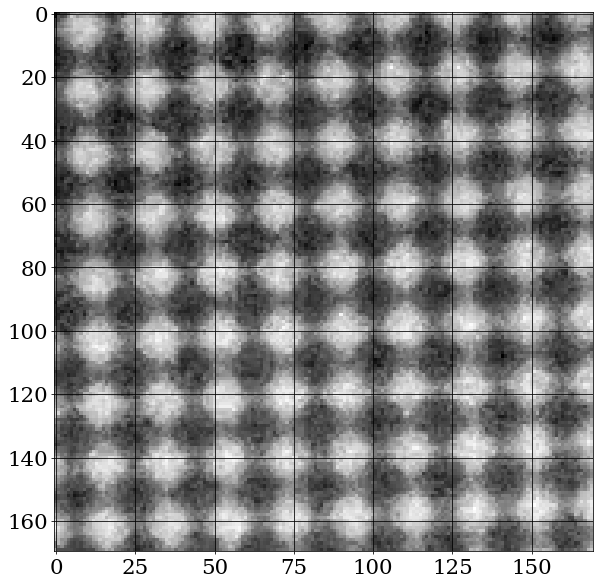

In [4]:
plt.imshow(ref_frame[190:360,520:690], cmap='gray')

In [5]:
vs = cv.VideoCapture('gotapatrondifuso.mp4')
lim = [520,690,190,360]

carriers = calculate_carriers(ref_frame[190:360,520:690])

maps = obtener_deformacion(vs,lim,carriers, SHOW=True)

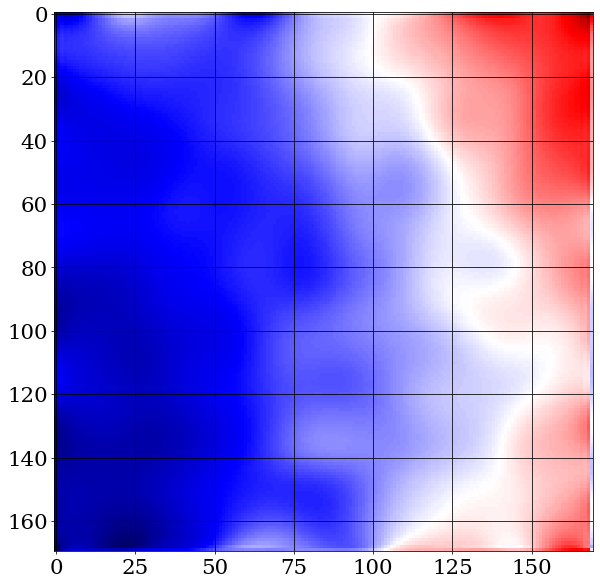

In [7]:
fig, ax = plt.subplots()
im = ax.imshow(maps[0],cmap='seismic')

In [8]:
def init():
    im.set_data(maps[0])
    return [im]

def animate_func(i):
    im.set_data(maps[i])
    return [im]

anim = animation.FuncAnimation(
                            fig, 
                            animate_func, 
                            frames = 3025,
                            interval = 1,
                            init_func = init,
                            blit=True
                            )
anim.save('diffused_anim.mp4', fps=60, extra_args=['-vcodec', 'libx264'])

## Para patrón fino

In [12]:
vs = cv.VideoCapture('gotapatronfino.mp4')
i=0
while(vs.isOpened()):
    ret, frame = vs.read()
    if ret: 
        i+=1
        if i==368:
            ref_frame = gris(frame)
        cv.imshow('frame', frame)
        if cv.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break
cv.destroyAllWindows()

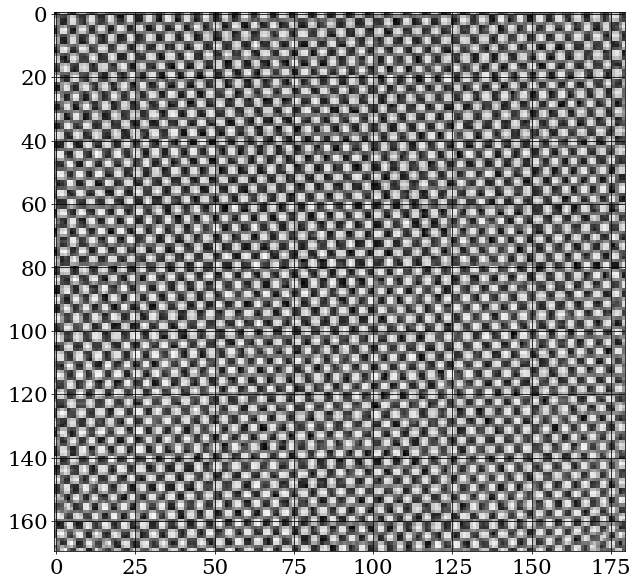

In [28]:
plt.imshow(ref_frame[195:365,435:615], cmap='gray')

In [34]:
vs = cv.VideoCapture('gotapatronfino.mp4')
lim = [435,615,195,365]
carriers = calculate_carriers(ref_frame[195:365,435:615])
maps = obtener_deformacion(vs,lim,carriers, SHOW=True)

In [35]:
def init():
    im.set_data(maps[0])
    return [im]

def animate_func(i):
    im.set_data(maps[i])
    return [im]

anim = animation.FuncAnimation(
                            fig, 
                            animate_func, 
                            frames = maps.size,
                            interval = 1,
                            init_func = init,
                            blit=True
                            )
anim.save('fine_anim.mp4', fps=60, extra_args=['-vcodec', 'libx264'])

## Para patron grueso

In [6]:
vs = cv.VideoCapture('gotapatrongrueso.mp4')
i=0
while(vs.isOpened()):
    ret, frame = vs.read()
    if ret: 
        i+=1
        if i==530:
            ref_frame = gris(frame)
        cv.imshow('frame', frame)
        if cv.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break
cv.destroyAllWindows()

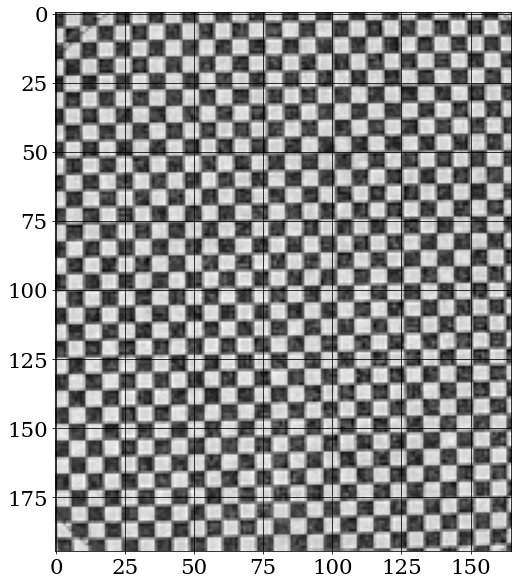

In [31]:
plt.imshow(ref_frame[265:460,365:530], cmap='gray')

In [32]:
vs = cv.VideoCapture('gotapatrongrueso.mp4')
lim = [365,530,265,460]
carriers = calculate_carriers(ref_frame[265:460,365:530])
maps = obtener_deformacion(vs,lim,carriers, SHOW=True)

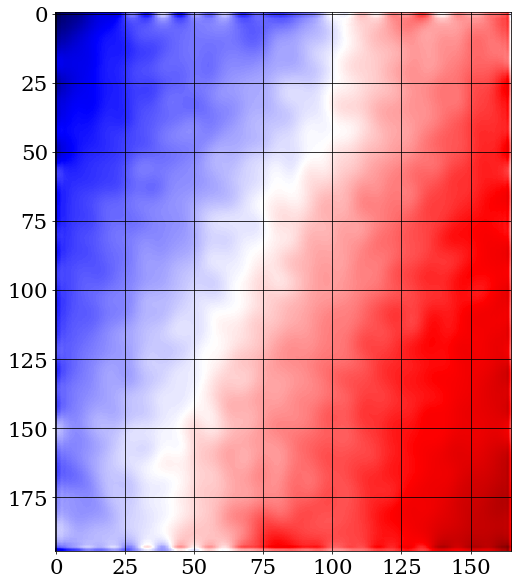

In [33]:
fig, ax = plt.subplots()
im = ax.imshow(maps[0],cmap='seismic')

In [34]:
def init():
    im.set_data(maps[0])
    return [im]

def animate_func(i):
    im.set_data(maps[i])
    return [im]

anim = animation.FuncAnimation(
                            fig, 
                            animate_func, 
                            frames = maps.size,
                            interval = 1,
                            init_func = init,
                            blit=True
                            )
anim.save('coarse_anim.mp4', fps=60, extra_args=['-vcodec', 'libx264'])